In [10]:
!pip install tensorflow-macos==2.16.2 tensorflow-metal==1.2.0 tf-keras==2.16.0 opencv-python mediapipe scikit-learn matplotlib


In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import mediapipe as mp

In [12]:
mp_holistic=mp.solutions.holistic #Holistic Model
mp_drawing=mp.solutions.drawing_utils #Drawing Utilities

In [13]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  #color coversion bgr to rgb
    image.flags.writeable=False                  #Image is no linger writeable
    results=model.process(image)                 #Make preductions
    image.flags.writeable=True                   #Image is now writeable 
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)  #color coversion rgb to bgr
    return image,results

In [45]:
#keypoints using MP holistic
cap=cv2.VideoCapture(0)
#Set ModelPipeline
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read frame
        ret,frame=cap.read()
        image,results = mediapipe_detection(frame,holistic)
        print(results)

        #Draw LandMarks
        draw_styled_landmarks(image,results)
        
        #show to screen
        cv2.imshow('OpenCV Feed',image)
        #brake gracefully
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1744267215.311308 2643886 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744267215.388013 2669262 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744267215.400676 2669264 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744267215.403222 2669262 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744267215.403294 2669265 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744267215.403542 2669263 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


2025-04-10 12:10:15.942 python[93144:2643886] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-10 12:10:15.942 python[93144:2643886] +[IMKInputSession subclass]: chose IMKInputSession_Modern


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [47]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION) #Draw face connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #draw pose connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw left hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw right hand connections

In [49]:
def draw_styled_landmarks(image,results):
     #Draw face connections
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                               mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    #draw pose connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                               mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)) 
    #draw left hand connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                               mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    #draw right hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))

In [51]:
draw_landmarks(frame,results)

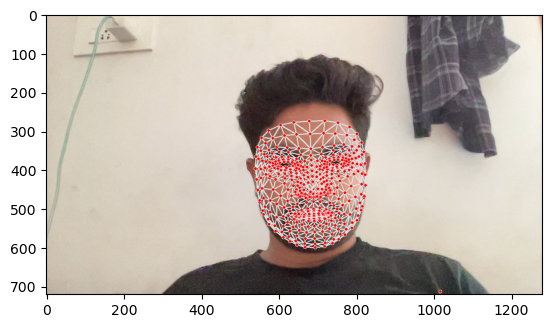

In [53]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [55]:
len(results.pose_landmarks.landmark)

33

In [57]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [59]:
pose

[array([ 0.53329116,  0.6356883 , -0.96969682,  0.999735  ]),
 array([ 0.56602603,  0.54717994, -0.92414016,  0.99930584]),
 array([ 0.58663946,  0.54482538, -0.92406309,  0.99944121]),
 array([ 0.59964359,  0.54328281, -0.92429674,  0.99922651]),
 array([ 0.50481224,  0.55023587, -0.92560607,  0.99943322]),
 array([ 0.48494038,  0.54979163, -0.92478669,  0.99958646]),
 array([ 0.46789885,  0.55181116, -0.92504615,  0.99951744]),
 array([ 0.62922704,  0.56246954, -0.55859232,  0.99926615]),
 array([ 0.45176452,  0.57972199, -0.53405571,  0.99969089]),
 array([ 0.57491887,  0.72009343, -0.82775307,  0.99962145]),
 array([ 0.50010407,  0.73230499, -0.82040226,  0.99972218]),
 array([ 0.79516435,  0.99057633, -0.30171636,  0.99437863]),
 array([ 0.31975952,  1.00780714, -0.38960811,  0.99850756]),
 array([ 0.90487844,  1.4669739 , -0.29427856,  0.04741673]),
 array([ 0.23210034,  1.55048013, -0.35479346,  0.28361046]),
 array([ 0.88820946,  1.91777515, -0.58144963,  0.02349327]),
 array([

In [63]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [65]:
len(results.face_landmarks.landmark)*3

1404

In [67]:
face

array([ 0.53978115,  0.69653523, -0.02691203, ...,  0.61055976,
        0.52066636,  0.01318448])

In [69]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [71]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [73]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose,face,lh,rh])

In [75]:
result_test=extract_keypoints(results).shape

In [77]:
np.save('0',result_test)

In [79]:
np.load('0.npy')

array([1662])

In [81]:
#SET UP FOLLDERS FOR COLLECTION

#path for exported data ,numpy arrays
DATA_PATH=os.path.join('MP_Data')

#Actions that we need to try
actions=np.array(['Hello','Thankyou','iloveyou'])

#Thirty videos worth of data
no_sequences=30

#Videos are goint to be 30 frames in length
sequence_length=30

In [83]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
        

In [85]:
#collect keypoints for training and testing
#keypoints using MP holistic
cap=cv2.VideoCapture(0)
#Set ModelPipeline
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    #Loop through actions
    for action in actions:
        #Loop through sequences in videos
        for sequence in range(no_sequences):
            #Loop through video length and sequence length
            for frame_num in range(sequence_length):
                #read frame
                ret,frame=cap.read()
                image,results = mediapipe_detection(frame,holistic)  # Fixed indentation here
                print(results)
                #Draw LandMarks
                draw_styled_landmarks(image,results)
                #Apply collection logic
                if frame_num==0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} videos Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)  # Fixed typo: waitkey -> waitKey
                else:
                    cv2.putText(image,'Collecting frames for {} videos Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                #New apply keypoints
                key_points=extract_keypoints(results)
                # Create directory path
                npy_path_dir = os.path.join(DATA_PATH, action, str(sequence))
                # Create directories if they don't exist
                os.makedirs(npy_path_dir, exist_ok=True)
                # Create file path for saving
                npy_path = os.path.join(npy_path_dir, str(frame_num))
                # Save keypoints
                np.save(npy_path, key_points)
                #show to screen
                cv2.imshow('OpenCV Feed',image)
                #brake gracefully
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1744267274.017317 2643886 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744267274.101054 2671121 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744267274.113282 2671121 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744267274.114512 2671123 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744267274.114972 2671119 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744267274.115033 2671122 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [88]:
#preprocess data and create Labels and Features
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [89]:
label_map={label:num for num, label in enumerate(actions)}

In [92]:
label_map

{'Hello': 0, 'Thankyou': 1, 'iloveyou': 2}

In [94]:
sequences, labels = [], []
for action in actions:
    # Get all items in the directory
    all_items = os.listdir(os.path.join(DATA_PATH, action))
    # Filter out non-numeric items like '.DS_Store'
    numeric_items = [item for item in all_items if item.isdigit()]
    
    for sequence in np.array(numeric_items).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [96]:
np.array(sequences).shape

(90, 30, 1662)

In [98]:
np.array(labels).shape

(90,)

In [100]:
X=np.array(sequences)

In [102]:
y=to_categorical(labels).astype(int)

In [104]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.05)

In [106]:
X_train.shape

(85, 30, 1662)

In [108]:
y_train.shape

(85, 3)

In [110]:
#Build and Train LSTM Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [112]:
log_dir=os.path.join('logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [114]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
actions.shape[0]

3

In [118]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [123]:
model.fit(X_train,y_train,epochs=50,callbacks=[tb_callback])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.2427 - loss: 3.0905
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.2702 - loss: 3.4507
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3993 - loss: 4.6910
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.4090 - loss: 6.3463
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - categorical_accuracy: 0.3210 - loss: 7.2377
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - categorical_accuracy: 0.4227 - loss: 10.9541
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - categorical_accuracy: 0.2760 - loss: 34.1092
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3914 - loss: 18.3629
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3875 - loss: 11.2021
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3268 - loss: 13.0702
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_a

In [125]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [127]:
#Make predictions
res=model.predict(x_test)

2025-04-10 12:19:40.409363: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


In [129]:
actions[np.argmax(res[2])]

'iloveyou'

In [131]:
actions[np.argmax(y_test[2])]

'Thankyou'

In [153]:
actions[y_test[0]]

array(['Hello', 'Hello', 'Thankyou'], dtype='<U8')

In [135]:
model.save('action.h5')

In [137]:
#Evaluation using confusion matrix and accuracy
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [139]:
yhat=model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step


In [149]:
ytrue=np.argmax(y_train,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

AxisError: axis 1 is out of bounds for array of dimension 1

In [157]:
import numpy as np  # Make sure numpy is imported

# Check if y_train and yhat are lists and convert to numpy arrays if needed
if isinstance(y_train, list):
    y_train = np.array(y_train)
if isinstance(yhat, list):
    yhat = np.array(yhat)

# Now you can check the shape
print("y_train shape:", y_train.shape)
print("yhat shape:", yhat.shape)

# If y_train and yhat are already 1D arrays (not one-hot encoded)
if len(y_train.shape) == 1:
    ytrue = y_train.tolist()  # No need for argmax if already class indices
else:
    # If one-hot encoded (2D)
    ytrue = np.argmax(y_train, axis=1).tolist()

if len(yhat.shape) == 1:
    ypred = yhat.tolist()  # No need for argmax if already class indices
else:
    # If one-hot encoded (2D)
    ypred = np.argmax(yhat, axis=1).tolist()

y_train shape: (85, 3)
yhat shape: (85,)


In [159]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[55,  1],
        [ 8, 21]],

       [[41, 17],
        [ 4, 23]],

       [[51,  5],
        [11, 18]]])

In [161]:
accuracy_score(ytrue,yhat)

0.7294117647058823

In [212]:
#1.New Detection variables
sequence=[]
sentence=[]
threshold=0.7


#keypoints using MP holistic
cap=cv2.VideoCapture(0)
#Set ModelPipeline
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read frame
        ret,frame=cap.read()
        image,results = mediapipe_detection(frame,holistic)
        print(results)

        #Draw LandMarks
        draw_styled_landmarks(image,results)

        #2.Prediction Logic

        keypoints=extract_keypoints(results)
       # sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence=sequence[-30:]


        if len(sequence)==30:
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])

        #3.Viz Logic

        if res[np.argmax(res)]>threshold: 
            if len(sentence)>0:
                if res[np.argmax(res)] > threshold: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image=prob_viz(res,actions,image,colors)
            
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        
        #show to screen
        cv2.imshow('OpenCV Feed',image)
        #brake gracefully
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1744270470.773058 2643886 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744270470.861166 2781224 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744270470.873251 2781228 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744270470.875563 2781228 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744270470.875591 2781230 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744270470.875884 2781229 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [163]:
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


array([[0.01714995, 0.2306629 , 0.7521872 ],
       [0.8838191 , 0.04122997, 0.07495089],
       [0.03382459, 0.32170102, 0.6444744 ],
       [0.00312893, 0.917795  , 0.07907601],
       [0.01458487, 0.60359836, 0.3818168 ]], dtype=float32)

In [169]:
np.expand_dims(x_test[0],axis=0).shape

(1, 30, 1662)

In [200]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

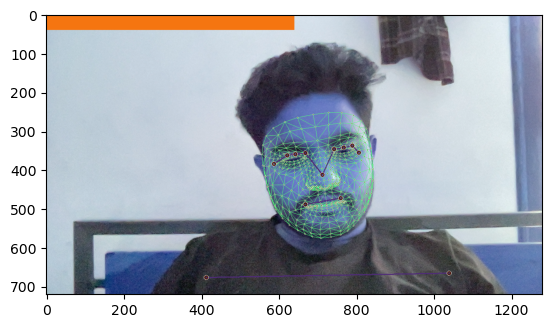

In [202]:
plt.imshow(image)

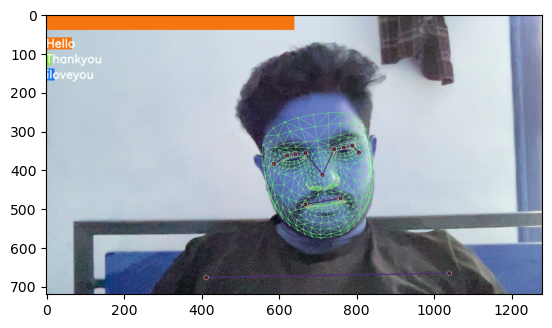

In [206]:
plt.imshow(prob_viz(res,actions,image,colors))